In [27]:
import time
import cv2
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.utils import np_utils
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

In [2]:
base_dir ='/Users/Alan/Downloads/airplanes'
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir,'test')
validation_dir = os.path.join(base_dir,'validation')

In [3]:
len(os.listdir(validation_dir))

74

In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [6]:
train_generator = train_datagen.flow_from_directory(base_dir,
                                                 target_size=(150,150),
                                                 batch_size=20,
                                                 class_mode='binary')

Found 1074 images belonging to 3 classes.


In [7]:
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                   target_size=(150,150),
                                                   batch_size=20,
                                                   class_mode='binary')

Found 0 images belonging to 0 classes.


In [8]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3),activation='relu',
         input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [10]:
model.compile(loss = 'binary_crossentropy',
             optimizer = optimizers.RMSprop(lr=1e-4),
             metrics = ['acc'])

In [11]:
earlystop = EarlyStopping(monitor = 'acc', min_delta = 0.0001, patience=5, 
                          verbose=0, mode='auto')

checkpoint = ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', 
                             save_best_only=True)

callbacks_list = [earlystop, checkpoint]

In [12]:
start = time.time()

In [13]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=10,
                             callbacks=callbacks_list, 
                             validation_data=validation_generator,
                             validation_steps=20)

Epoch 1/10
100/100 [==============================] - 62s 623ms/step - loss: 0.3671 - acc: 0.7421
Epoch 2/10
100/100 [==============================] - 59s 591ms/step - loss: 0.3482 - acc: 0.7492
Epoch 3/10
100/100 [==============================] - 57s 566ms/step - loss: 0.3207 - acc: 0.7431
Epoch 4/10
100/100 [==============================] - 68s 681ms/step - loss: 0.2951 - acc: 0.7524
Epoch 5/10
100/100 [==============================] - 60s 601ms/step - loss: 0.2958 - acc: 0.7468
Epoch 6/10
100/100 [==============================] - 58s 581ms/step - loss: 0.2567 - acc: 0.7535
Epoch 7/10
100/100 [==============================] - 60s 604ms/step - loss: 0.2589 - acc: 0.7506
Epoch 8/10
100/100 [==============================] - 59s 595ms/step - loss: 0.2088 - acc: 0.7609
Epoch 9/10
100/100 [==============================] - 60s 598ms/step - loss: 0.1805 - acc: 0.7597
Epoch 10/10
100/100 [==============================] - 57s 570ms/step - loss: 0.1727 - acc: 0.7543


In [15]:
end = time.time()
print ("Model took %0.2f seconds to train"% (end - start))

Model took 614.73 seconds to train


In [16]:
model.save('weights.h5')

In [22]:
def plot_model_history(history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    axs[0].plot(range(1,len(history.history['acc'])+1),history.history['acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(history.history['acc'])+1),len(history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    axs[1].plot(range(1,len(history.history['loss'])+1),history.history['loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(history.history['loss'])+1),len(history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

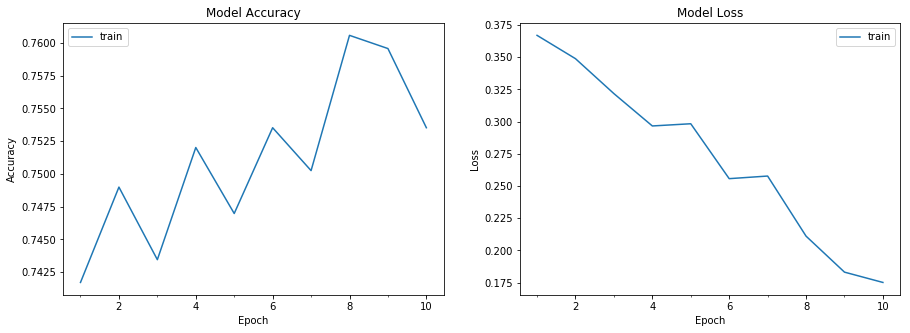

In [23]:
plot_model_history(history)

In [24]:
image_path = os.path.join(test_dir,'0801.jpg')

In [25]:
img  = image.load_img(image_path, target_size=(150,150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor,axis=0)
img_tensor /= 255.

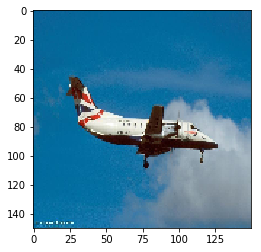

In [28]:
plt.imshow(img_tensor[0])